<a href="https://colab.research.google.com/github/eduardocarbo/NewRepo/blob/master/Regresi%C3%B3n_Lineal_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Regresión lineal : Iris

In [3]:
from google.colab import files
uploaded=files.upload()

Saving iris.csv to iris.csv


In [9]:
# Import pandas
import pandas as pd
df = pd.read_csv("iris.csv", header = None, sep = ',')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','class']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##Exploración de los datos

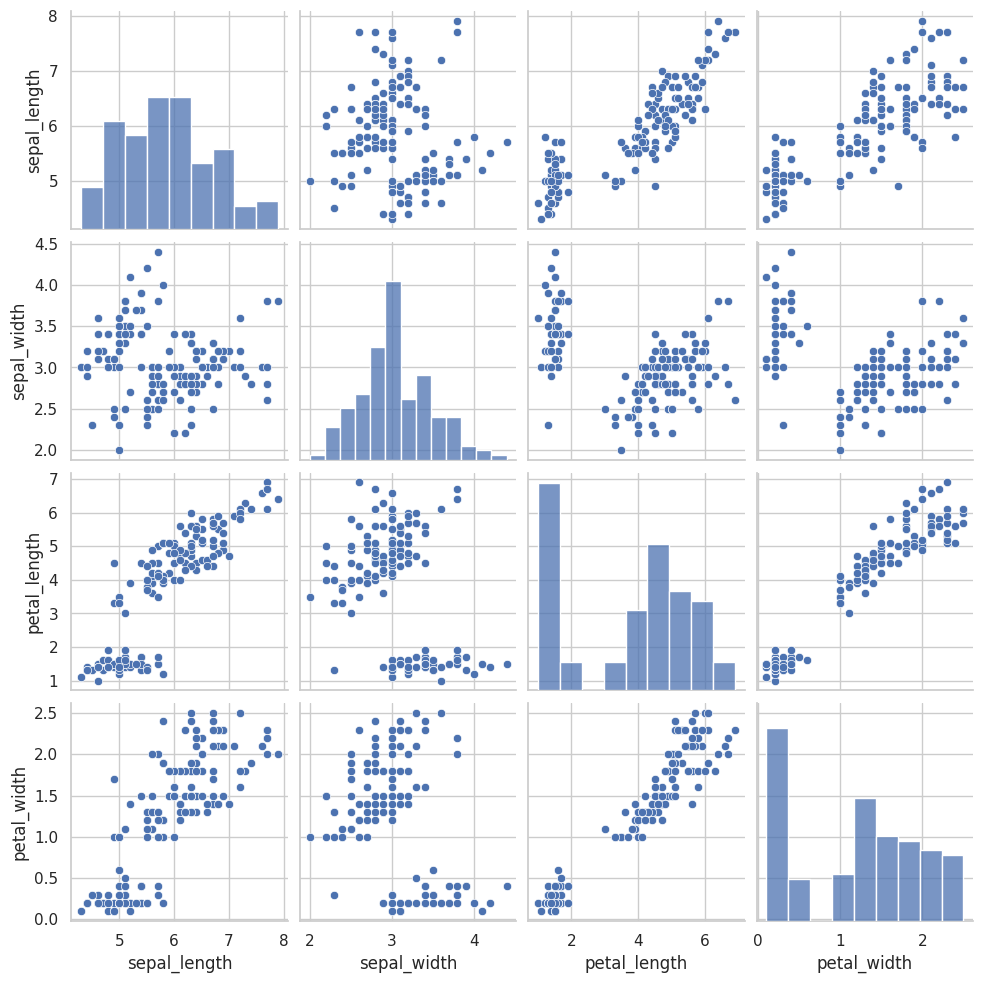

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context ='notebook')
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
sns.pairplot(df[cols], height =2.5)
plt.show()

Una vez que vemos cómo están correlacionadas las variables de manera visual, es importante usar un método numérico para poder entender las correlaciones.

<Axes: >

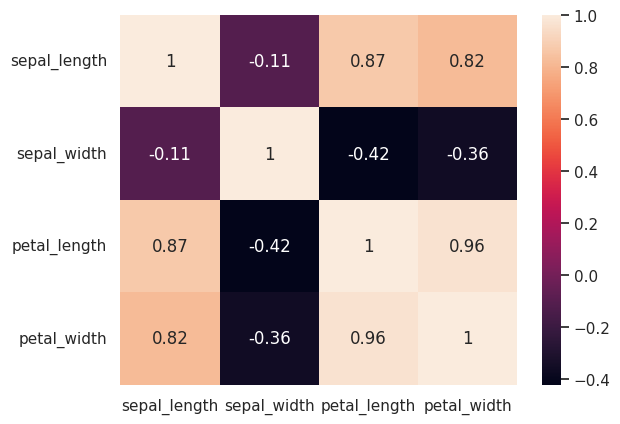

In [13]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.0)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

##Creando el modelo con scikit-learn

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df['petal_length'].values.reshape(-1, 1)
y = df['petal_width'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

Análisis de resultados

Text(0.5, 0, 'Petal width')

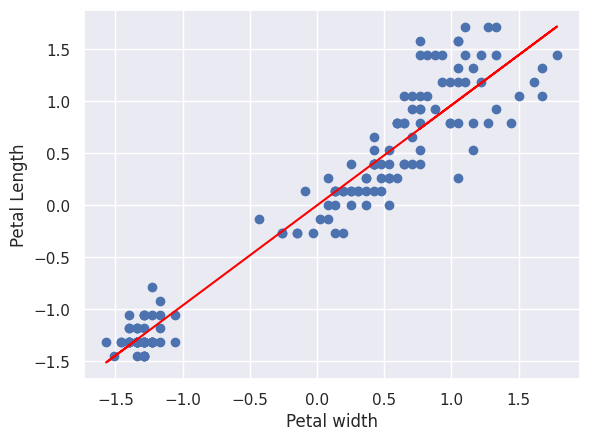

In [18]:
plt.scatter(X_std,y_std)
plt.plot(X_std,slr.predict(X_std), color='Red')
plt.ylabel("Petal Length")
plt.xlabel("Petal width")

##Generando predicciòn con el modelo

In [19]:
petal_width_num = 2
petal_width_num_std = sc_x.transform(np.array([petal_width_num]).reshape(-1,1))
print("El tamaño de los pétalos en le dataset Iris es : ", sc_y.inverse_transform(slr.predict(petal_width_num_std)))

El tamaño de los pétalos en le dataset Iris es :  [[0.46632422]]
